In [1]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns',35)
pd.set_option('display.max_rows',35)

In [3]:
limit=1000
offset=0
params={
    '$limit':limit,
    '$offset':offset
}

In [4]:
url='https://data.buffalony.gov/resource/d6g9-xbgu.json'

In [5]:
df_list=[]
while True:
    params={
        '$limit':limit,
        '$offset':offset
    }
    response=requests.get(url,params=params)
    data=response.json()
    df_page=pd.DataFrame(data)
    if df_page.empty:
        break
    df_list.append(df_page)
    offset+=limit
df=pd.concat(df_list,ignore_index=True)

In [6]:
df

,case_number,incident_datetime,incident_type_primary,incident_description,parent_incident_type,hour_of_day,day_of_week,address_1,city,state,location,latitude,longitude,zip_code,neighborhood,council_district,council_district_2011,census_tract,census_block_group,census_block,census_tract_2010,census_block_group_2010,census_block_2010,police_district,tractce20,geoid20_tract,geoid20_blockgroup,geoid20_block,:@computed_region_jdfw_hhbp,:@computed_region_h7a8_iwt4,:@computed_region_ff6v_jbaa,:@computed_region_vsen_jbmg,:@computed_region_nmyf_6jtp,:@computed_region_yg52_574g,created_at
0,16-1660403,2016-06-14T01:20:00.000,ASSAULT,ASSAULT,Assault,1,Tuesday,E AMHERST ST & E AMHERST ST,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.889, 42....",42.938,-78.889,14207,Grant-Amherst,NORTH,NORTH,55,2,2003,55,2,2005,District D,005500,36029005500,360290001102,360290170002003,18,10,4,2,7,7,NaN
1,16-3480266,2016-12-13T05:00:00.000,LARCENY/THEFT,LARCENY/THEFT,Theft,5,Tuesday,1000 Block E LOVEJOY ST,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.809, 42....",42.889,-78.809,14206,Lovejoy,LOVEJOY,LOVEJOY,23,4,4001,23,4,4001,District C,002300,36029002300,360290002004,360290034004001,8,5,86,1,25,2,2016-12-14T05:07:00.000
2,20-2010167,2020-07-19T03:09:00.000,ASSAULT,Buffalo Police are investigating this report o...,Assault,3,Sunday,GRIDER ST & KENSINGTON WB,Buffalo,NY,NaN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,14-3210732,2014-11-17T08:08:00.000,LARCENY/THEFT,LARCENY/THEFT,Theft,8,Monday,2100 Block ELMWOOD AV,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.879, 42....",42.954,-78.879,14207,West Hertel,NORTH,NORTH,56,2,2007,56,2,2008,District D,005600,36029005600,360290001102,360290163002007,18,10,79,2,19,7,2014-11-18T07:05:00.000
4,15-1100268,2015-04-20T10:22:00.000,LARCENY/THEFT,LARCENY/THEFT,Theft,10,Monday,2100 Block ELMWOOD AV,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.879, 42....",42.954,-78.879,14207,West Hertel,NORTH,NORTH,56,2,2007,56,2,2008,District D,005600,36029005600,360290001102,360290163002007,18,10,79,2,19,7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314713,24-2700371,2024-09-26T09:13:39.000,BURGLARY,Buffalo Police are investigating this report o...,Breaking & Entering,9,Thursday,1300 Block SYCAMORE ST,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.821, 42....",42.903,-78.821,14211,Genesee-Moselle,FILLMORE,FILLMORE,28.02,1,1005,28,4,4008,District C,002802,36029002802,360290028021,360290028021005,2,2,57,1,24,6,2024-09-26T09:14:39.000
314714,24-2740620,2024-09-30T14:12:05.000,LARCENY/THEFT,Buffalo Police are investigating this report o...,Theft,14,Monday,100 Block SHIRLEY AV,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.817, 42....",42.945,-78.817,14215,University Heights,UNIVERSITY,UNIVERSITY,47.01,1,1003,47,2,2003,District E,004701,36029004701,360290047011,360290047011003,11,7,23,4,34,9,2024-09-30T14:12:05.000
314715,24-2101036,2024-07-28T19:16:06.000,ASSAULT,Buffalo Police are investigating this report o...,Assault,19,Sunday,200 Block CAMBRIDGE AV,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.822, 42....",42.921,-78.822,14215,Genesee-Moselle,MASTEN,MASTEN,36,4,4001,36,2,2000,District E,003600,36029003600,360290036004,360290036004001,11,8,36,4,24,1,2024-07-28T19:17:06.000
314716,24-2190851,2024-08-06T16:44:23.000,UUV,Buffalo Police are investigating this report o...,Theft of Vehicle,16,Tuesday,300 Block ESSER AV,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.899, 42....",42.959,-78.899,14207,Riverside,NORTH,NORTH,58.02,4,4001,58.02,4,4001,District D,005802,36029005802,360290058024,360290058024001,18,10,64,2,15,7,2024-08-06T16:45:23.000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314718 entries, 0 to 314717
Data columns (total 35 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   case_number                  314718 non-null  object
 1   incident_datetime            314718 non-null  object
 2   incident_type_primary        314718 non-null  object
 3   incident_description         314718 non-null  object
 4   parent_incident_type         314718 non-null  object
 5   hour_of_day                  314718 non-null  object
 6   day_of_week                  314718 non-null  object
 7   address_1                    314678 non-null  object
 8   city                         314718 non-null  object
 9   state                        314718 non-null  object
 10  location                     308467 non-null  object
 11  latitude                     313720 non-null  object
 12  longitude                    313720 non-null  object
 13  zip_code      

In [8]:
df['incident_datetime']=pd.to_datetime(df['incident_datetime'],format='%Y-%m-%dT%H:%M:%S.%f')

In [9]:
df['incident_description'].value_counts()

incident_description
Buffalo Police are investigating this report of a crime.  It is important to note that this is very preliminary information and further investigation as to the facts and circumstances of this report may be necessary.    305409
Buffalo Police are investigating this report of a crime. It is important to note that this is very preliminary information and further investigation as to the facts and circumstances of this report may be necessary.       5163
LARCENY/THEFT                                                                                                                                                                                                                 1982
BURGLARY                                                                                                                                                                                                                      1044
ASSAULT                                                                

In [10]:
df['incident_description'] = df['incident_description'].str.replace(r'\s+', ' ', regex=True)

In [11]:
df['incident_description']=df['incident_description'].str.replace('Buffalo Police are investigating this report of a crime. It is important to note that this is very preliminary information and further investigation as to the facts and circumstances of this report may be necessary.','under investigation')

In [12]:
df['incident_description']=df['incident_description'].str.replace('Buffalo Police are investigating this report of a crime. It is important to note that this is very preliminary information and further investigation as to the facts and circumstances of this report may be necessary.','under investigation')

In [13]:
df['incident_description'].value_counts()

incident_description
under investigation         310572
LARCENY/THEFT                 1982
BURGLARY                      1044
ASSAULT                        711
SEXUAL ABUSE                   149
UUV                            116
RAPE                            73
ROBBERY                         32
CRIM NEGLIGENT HOMICIDE         25
THEFT OF SERVICES                9
AGGR ASSAULT                     2
MURDER                           2
AGG ASSAULT ON P/OFFICER         1
Name: count, dtype: int64

In [14]:
df

,case_number,incident_datetime,incident_type_primary,incident_description,parent_incident_type,hour_of_day,day_of_week,address_1,city,state,location,latitude,longitude,zip_code,neighborhood,council_district,council_district_2011,census_tract,census_block_group,census_block,census_tract_2010,census_block_group_2010,census_block_2010,police_district,tractce20,geoid20_tract,geoid20_blockgroup,geoid20_block,:@computed_region_jdfw_hhbp,:@computed_region_h7a8_iwt4,:@computed_region_ff6v_jbaa,:@computed_region_vsen_jbmg,:@computed_region_nmyf_6jtp,:@computed_region_yg52_574g,created_at
0,16-1660403,2016-06-14 01:20:00,ASSAULT,ASSAULT,Assault,1,Tuesday,E AMHERST ST & E AMHERST ST,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.889, 42....",42.938,-78.889,14207,Grant-Amherst,NORTH,NORTH,55,2,2003,55,2,2005,District D,005500,36029005500,360290001102,360290170002003,18,10,4,2,7,7,NaN
1,16-3480266,2016-12-13 05:00:00,LARCENY/THEFT,LARCENY/THEFT,Theft,5,Tuesday,1000 Block E LOVEJOY ST,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.809, 42....",42.889,-78.809,14206,Lovejoy,LOVEJOY,LOVEJOY,23,4,4001,23,4,4001,District C,002300,36029002300,360290002004,360290034004001,8,5,86,1,25,2,2016-12-14T05:07:00.000
2,20-2010167,2020-07-19 03:09:00,ASSAULT,under investigation,Assault,3,Sunday,GRIDER ST & KENSINGTON WB,Buffalo,NY,NaN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,14-3210732,2014-11-17 08:08:00,LARCENY/THEFT,LARCENY/THEFT,Theft,8,Monday,2100 Block ELMWOOD AV,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.879, 42....",42.954,-78.879,14207,West Hertel,NORTH,NORTH,56,2,2007,56,2,2008,District D,005600,36029005600,360290001102,360290163002007,18,10,79,2,19,7,2014-11-18T07:05:00.000
4,15-1100268,2015-04-20 10:22:00,LARCENY/THEFT,LARCENY/THEFT,Theft,10,Monday,2100 Block ELMWOOD AV,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.879, 42....",42.954,-78.879,14207,West Hertel,NORTH,NORTH,56,2,2007,56,2,2008,District D,005600,36029005600,360290001102,360290163002007,18,10,79,2,19,7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314713,24-2700371,2024-09-26 09:13:39,BURGLARY,under investigation,Breaking & Entering,9,Thursday,1300 Block SYCAMORE ST,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.821, 42....",42.903,-78.821,14211,Genesee-Moselle,FILLMORE,FILLMORE,28.02,1,1005,28,4,4008,District C,002802,36029002802,360290028021,360290028021005,2,2,57,1,24,6,2024-09-26T09:14:39.000
314714,24-2740620,2024-09-30 14:12:05,LARCENY/THEFT,under investigation,Theft,14,Monday,100 Block SHIRLEY AV,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.817, 42....",42.945,-78.817,14215,University Heights,UNIVERSITY,UNIVERSITY,47.01,1,1003,47,2,2003,District E,004701,36029004701,360290047011,360290047011003,11,7,23,4,34,9,2024-09-30T14:12:05.000
314715,24-2101036,2024-07-28 19:16:06,ASSAULT,under investigation,Assault,19,Sunday,200 Block CAMBRIDGE AV,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.822, 42....",42.921,-78.822,14215,Genesee-Moselle,MASTEN,MASTEN,36,4,4001,36,2,2000,District E,003600,36029003600,360290036004,360290036004001,11,8,36,4,24,1,2024-07-28T19:17:06.000
314716,24-2190851,2024-08-06 16:44:23,UUV,under investigation,Theft of Vehicle,16,Tuesday,300 Block ESSER AV,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.899, 42....",42.959,-78.899,14207,Riverside,NORTH,NORTH,58.02,4,4001,58.02,4,4001,District D,005802,36029005802,360290058024,360290058024001,18,10,64,2,15,7,2024-08-06T16:45:23.000


In [15]:
df.isnull().sum()

case_number                         0
incident_datetime                   0
incident_type_primary               0
incident_description                0
parent_incident_type                0
hour_of_day                         0
day_of_week                         0
address_1                          40
city                                0
state                               0
location                         6251
latitude                          998
longitude                         998
zip_code                         2366
neighborhood                     3314
council_district                 2417
council_district_2011            2366
census_tract                     3314
census_block_group               3314
census_block                     3314
census_tract_2010                3314
census_block_group_2010          3314
census_block_2010                3314
police_district                  3314
tractce20                        3181
geoid20_tract                    3181
geoid20_bloc

In [16]:
df=df.replace('UNKNOWN',np.nan)

In [17]:
df.isnull().sum()

case_number                         0
incident_datetime                   0
incident_type_primary               0
incident_description                0
parent_incident_type                0
hour_of_day                         0
day_of_week                         0
address_1                          57
city                                0
state                               0
location                         6251
latitude                         6251
longitude                        6251
zip_code                         3638
neighborhood                     6377
council_district                 2417
council_district_2011            3709
census_tract                     6245
census_block_group               6245
census_block                     6245
census_tract_2010               19862
census_block_group_2010         19902
census_block_2010               19864
police_district                  6256
tractce20                        6245
geoid20_tract                    6245
geoid20_bloc

In [18]:
df=df.sort_values(by='incident_datetime')

In [19]:
# df.to_csv('crime_dataset_buffalo.csv')

In [20]:
df['hour_of_day']=pd.to_datetime(df['hour_of_day'],format='%H')
df['hour_of_day']=df['hour_of_day'].dt.hour

In [21]:
df.isnull().sum()

case_number                         0
incident_datetime                   0
incident_type_primary               0
incident_description                0
parent_incident_type                0
hour_of_day                         0
day_of_week                         0
address_1                          57
city                                0
state                               0
location                         6251
latitude                         6251
longitude                        6251
zip_code                         3638
neighborhood                     6377
council_district                 2417
council_district_2011            3709
census_tract                     6245
census_block_group               6245
census_block                     6245
census_tract_2010               19862
census_block_group_2010         19902
census_block_2010               19864
police_district                  6256
tractce20                        6245
geoid20_tract                    6245
geoid20_bloc

In [22]:
df=df[df['incident_datetime']>='2009']


In [23]:
df

,case_number,incident_datetime,incident_type_primary,incident_description,parent_incident_type,hour_of_day,day_of_week,address_1,city,state,location,latitude,longitude,zip_code,neighborhood,council_district,council_district_2011,census_tract,census_block_group,census_block,census_tract_2010,census_block_group_2010,census_block_2010,police_district,tractce20,geoid20_tract,geoid20_blockgroup,geoid20_block,:@computed_region_jdfw_hhbp,:@computed_region_h7a8_iwt4,:@computed_region_ff6v_jbaa,:@computed_region_vsen_jbmg,:@computed_region_nmyf_6jtp,:@computed_region_yg52_574g,created_at
242701,13-1620215,2009-01-01 00:00:00,LARCENY/THEFT,under investigation,Theft,0,Thursday,700 Block TACOMA AV,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.845, 42....",42.95,-78.845,14216,North Park,DELAWARE,DELAWARE,48,3,3013,48,3,3013,District D,004800,36029004800,360290001103,360290024003013,13,1,43,2,33,8,NaN
118091,10-3360576,2009-01-01 00:00:00,BURGLARY,under investigation,Breaking & Entering,0,Thursday,200 Block BIRD AV,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.89, 42.9...",42.926,-78.89,14213,Upper West Side,NIAGARA,NIAGARA,171,3,3002,171,3,3002,District D,017100,36029017100,360290001103,360290071043002,10,6,73,2,31,5,2010-12-03T07:01:00.000
92785,09-0030182,2009-01-01 00:00:00,BURGLARY,under investigation,Breaking & Entering,0,Thursday,1 Block MILBURN ST,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.826, 42....",42.891,-78.826,14212,Broadway Fillmore,FILLMORE,FILLMORE,24,5,5005,24,1,1008,District C,002400,36029002400,360290007005,360290034005005,2,2,6,1,35,6,NaN
110552,09-1210237,2009-01-01 00:00:00,LARCENY/THEFT,under investigation,Theft,0,Thursday,100 Block KRAKOW ST,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.809, 42....",42.875,-78.809,14206,Kaisertown,LOVEJOY,LOVEJOY,167,3,3019,167,3,3021,District A,016700,36029016700,360290001103,360290001103019,8,5,39,3,12,2,NaN
69082,09-0830328,2009-01-01 00:00:00,SEXUAL ABUSE,under investigation,Other Sexual Offense,0,Thursday,1000 Block W DELAVAN AV,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.861, 42....",42.922,-78.861,14209,Elmwood Bidwell,ELLICOTT,ELLICOTT,169,4,4002,169,4,4000,District D,016900,36029016900,360290002004,360290002004002,14,4,10,2,14,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314410,24-2801096,2024-10-06 22:02:47,LARCENY/THEFT,under investigation,Theft,22,Sunday,0 Block WEX AV,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.808, 42....",42.904,-78.808,14211,Genesee-Moselle,LOVEJOY,LOVEJOY,30,2,2005,30,2,2005,District C,003000,36029003000,360290030002,360290030002005,17,5,51,1,24,2,2024-10-06T22:03:47.000
314406,24-2801108,2024-10-06 22:19:45,UUV,under investigation,Theft of Vehicle,22,Sunday,0 Block GARVEY AV,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.83, 42.8...",42.848,-78.83,14220,Hopkins-Tifft,SOUTH,SOUTH,2,3,3003,2,3,3003,District A,000200,36029000200,360290002003,360290002003003,1,9,40,3,27,4,2024-10-06T22:20:45.000
313169,24-2801138,2024-10-06 22:48:06,LARCENY/THEFT,under investigation,Theft,22,Sunday,200 Block HUMBOLDT PW,Buffalo,NY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-10-06T22:49:06.000
314387,24-2810228,2024-10-07 06:40:00,LARCENY/THEFT,under investigation,Theft,8,Monday,100 Block ANDERSON PL,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.875, 42....",42.913,-78.875,14222,Elmwood Bryant,ELLICOTT,NIAGARA,66.02,2,2001,66.02,2,2001,District B,006602,36029006602,360290066022,360290066022001,4,6,49,5,4,3,2024-10-07T08:41:58.000


In [24]:
df.isnull().sum()

case_number                         0
incident_datetime                   0
incident_type_primary               0
incident_description                0
parent_incident_type                0
hour_of_day                         0
day_of_week                         0
address_1                          32
city                                0
state                               0
location                         5983
latitude                         5983
longitude                        5983
zip_code                         3276
neighborhood                     5978
council_district                 2289
council_district_2011            3329
census_tract                     5888
census_block_group               5888
census_block                     5888
census_tract_2010               19482
census_block_group_2010         19510
census_block_2010               19484
police_district                  5891
tractce20                        5888
geoid20_tract                    5888
geoid20_bloc

In [25]:
df=df.reset_index(drop=True)

In [26]:
df['incident_type_primary']=df['incident_type_primary'].str.lower()

In [27]:
df['incident_type_primary'].value_counts()

incident_type_primary
larceny/theft               113219
assault                      52449
burglary                     45198
uuv                          25016
robbery                      15601
rape                          2368
sexual abuse                  2292
theft of services             1775
murder                         837
breaking & entering             83
aggr assault                    75
crim negligent homicide         67
theft                           33
manslaughter                    15
agg assault on p/officer        10
sexual assault                   5
theft of vehicle                 3
other sexual offense             2
sodomy                           2
homicide                         1
Name: count, dtype: int64

In [28]:
df.columns

Index(['case_number', 'incident_datetime', 'incident_type_primary',
       'incident_description', 'parent_incident_type', 'hour_of_day',
       'day_of_week', 'address_1', 'city', 'state', 'location', 'latitude',
       'longitude', 'zip_code', 'neighborhood', 'council_district',
       'council_district_2011', 'census_tract', 'census_block_group',
       'census_block', 'census_tract_2010', 'census_block_group_2010',
       'census_block_2010', 'police_district', 'tractce20', 'geoid20_tract',
       'geoid20_blockgroup', 'geoid20_block', ':@computed_region_jdfw_hhbp',
       ':@computed_region_h7a8_iwt4', ':@computed_region_ff6v_jbaa',
       ':@computed_region_vsen_jbmg', ':@computed_region_nmyf_6jtp',
       ':@computed_region_yg52_574g', 'created_at'],
      dtype='object')

In [29]:
df['latitude']=df['latitude'].astype('float64')
df['longitude']=df['longitude'].astype('float64')

In [30]:
df.isnull().sum()

case_number                         0
incident_datetime                   0
incident_type_primary               0
incident_description                0
parent_incident_type                0
hour_of_day                         0
day_of_week                         0
address_1                          32
city                                0
state                               0
location                         5983
latitude                         5983
longitude                        5983
zip_code                         3276
neighborhood                     5978
council_district                 2289
council_district_2011            3329
census_tract                     5888
census_block_group               5888
census_block                     5888
census_tract_2010               19482
census_block_group_2010         19510
census_block_2010               19484
police_district                  5891
tractce20                        5888
geoid20_tract                    5888
geoid20_bloc

In [31]:
df_filtered=df.drop(columns=['created_at'])

In [33]:
df_filtered.dropna(axis='index',inplace=True)

In [34]:
# df_filtered.to_csv('filtered_data.csv')

In [35]:
df_filtered['address_1']=df_filtered['address_1'].str.lower()

In [131]:
df['incident_type_primary'].unique()


array(['larceny/theft', 'burglary', 'sexual abuse', 'rape', 'uuv',
       'theft of services', 'assault', 'robbery', 'murder',
       'aggr assault', 'manslaughter', 'theft', 'breaking & entering',
       'theft of vehicle', 'sexual assault', 'other sexual offense',
       'homicide', 'crim negligent homicide', 'agg assault on p/officer',
       'sodomy'], dtype=object)

In [133]:
df_filtered.isnull().sum()


case_number                    0
incident_datetime              0
incident_type_primary          0
incident_description           0
parent_incident_type           0
hour_of_day                    0
day_of_week                    0
address_1                      0
city                           0
state                          0
location                       0
latitude                       0
longitude                      0
zip_code                       0
neighborhood                   0
council_district               0
council_district_2011          0
census_tract                   0
census_block_group             0
census_block                   0
census_tract_2010              0
census_block_group_2010        0
census_block_2010              0
police_district                0
tractce20                      0
geoid20_tract                  0
geoid20_blockgroup             0
geoid20_block                  0
:@computed_region_jdfw_hhbp    0
:@computed_region_h7a8_iwt4    0
:@computed

In [135]:
# Convert dicts to strings
df_filtered['location'] = df_filtered['location'].apply(lambda x: str(x) if isinstance(x, dict) else x)


In [137]:
duplicate_rows_df = df_filtered[df_filtered.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df)

number of duplicate rows:         case_number   incident_datetime incident_type_primary  \
12      13-1620215 2009-01-01 00:00:00         larceny/theft   
71      18-3090492 2009-01-01 12:00:00          sexual abuse   
590     09-0110447 2009-01-11 03:30:00         larceny/theft   
638     09-0120658 2009-01-12 07:50:00              burglary   
1149    09-0220739 2009-01-22 20:00:00         larceny/theft   
...            ...                 ...                   ...   
258988  24-2780778 2024-10-04 15:15:00         larceny/theft   
258991  24-2790405 2024-10-04 17:00:00         larceny/theft   
259004  24-2790430 2024-10-05 11:20:00         larceny/theft   
259007  24-2790454 2024-10-05 11:46:25              burglary   
259023  24-2800210 2024-10-06 06:14:07         larceny/theft   

       incident_description  parent_incident_type  hour_of_day day_of_week  \
12      under investigation                 Theft            0    Thursday   
71      under investigation  Other Sexual Offens

In [139]:
# Find duplicate rows after fixing the dict issue
duplicate_rows_df = df_filtered[df_filtered.duplicated()]
print("Number of duplicate rows: ", len(duplicate_rows_df))


Number of duplicate rows:  31593


In [141]:
# Show all the duplicate rows
duplicate_rows_df = df_filtered[df_filtered.duplicated()]
print(duplicate_rows_df)


       case_number   incident_datetime incident_type_primary  \
12      13-1620215 2009-01-01 00:00:00         larceny/theft   
71      18-3090492 2009-01-01 12:00:00          sexual abuse   
590     09-0110447 2009-01-11 03:30:00         larceny/theft   
638     09-0120658 2009-01-12 07:50:00              burglary   
1149    09-0220739 2009-01-22 20:00:00         larceny/theft   
...            ...                 ...                   ...   
258988  24-2780778 2024-10-04 15:15:00         larceny/theft   
258991  24-2790405 2024-10-04 17:00:00         larceny/theft   
259004  24-2790430 2024-10-05 11:20:00         larceny/theft   
259007  24-2790454 2024-10-05 11:46:25              burglary   
259023  24-2800210 2024-10-06 06:14:07         larceny/theft   

       incident_description  parent_incident_type  hour_of_day day_of_week  \
12      under investigation                 Theft            0    Thursday   
71      under investigation  Other Sexual Offense           12    Thursday 

In [143]:
df_non_duplicates = df_filtered.drop_duplicates(keep=False)

In [145]:
df_non_duplicates.incident_type_primary.unique()

array(['burglary', 'larceny/theft', 'sexual abuse', 'rape', 'uuv',
       'theft of services', 'assault', 'robbery', 'murder',
       'aggr assault', 'manslaughter', 'theft', 'breaking & entering',
       'theft of vehicle', 'sexual assault', 'other sexual offense',
       'homicide', 'crim negligent homicide', 'agg assault on p/officer'],
      dtype=object)

In [147]:

# Crime categories grouping
sexual_crimes = ['other sexual offense', 'sexual assault', 'rape', 'sexual abuse', 'sodomy']
assault_crimes = ['agg assault on p/officer', 'aggr assault', 'assault']
vehicle_crimes = ['theft of vehicles', 'uuv', 'theft of vehicle']
theft_crimes = ['burglary', 'larceny/theft', 'robbery', 'theft of services', 'theft', 'breaking & entering']
murder_crimes = ['crim negligent homicide', 'homicide', 'manslaughter', 'murder']

# Replace crime types with broader categories
df_non_duplicates['incident_type_primary'] = df_non_duplicates['incident_type_primary'].replace(sexual_crimes, 'Sexual Crime')
df_non_duplicates['incident_type_primary'] = df_non_duplicates['incident_type_primary'].replace(assault_crimes, 'Assault Crime')
df_non_duplicates['incident_type_primary'] = df_non_duplicates['incident_type_primary'].replace(vehicle_crimes, 'Vehicle Crime')
df_non_duplicates['incident_type_primary'] = df_non_duplicates['incident_type_primary'].replace(theft_crimes, 'Theft Crime')
df_non_duplicates['incident_type_primary'] = df_non_duplicates['incident_type_primary'].replace(murder_crimes, 'Murder Crime')
    

C:\Users\sanhitha\AppData\Local\Temp\ipykernel_15716\4266199688.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_duplicates['incident_type_primary'] = df_non_duplicates['incident_type_primary'].replace(sexual_crimes, 'Sexual Crime')
C:\Users\sanhitha\AppData\Local\Temp\ipykernel_15716\4266199688.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_duplicates['incident_type_primary'] = df_non_duplicates['incident_type_primary'].replace(assault_crimes, 'Assault Crime')
C:\Users\sanhitha\AppDa

In [149]:
df_graph1 = df_non_duplicates.groupby('incident_type_primary')['case_number'].nunique().sort_values(ascending=False)


**QUESTION**


What underlying patterns or trends contribute to the distribution of different incident types in the dataset?



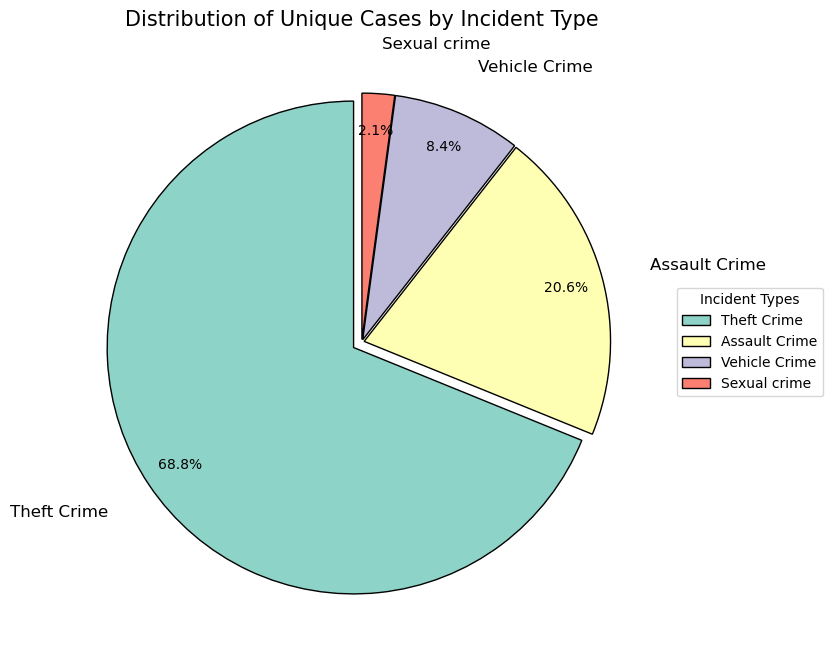

In [165]:
import matplotlib.pyplot as plt
import pandas as pd


df_graph1 = df_non_duplicates.groupby('incident_type_primary')['case_number'].nunique().sort_values(ascending=False)

# Set a threshold to group smaller slices together into 'Other'
threshold = 0.03 * df_graph1.sum()  # 3% threshold

# Grouping the smaller categories as "Other"
df_graph1_grouped = df_graph1[df_graph1 >= threshold]
df_graph1_grouped['Sexual crime'] = df_graph1[df_graph1 < threshold].sum()

# Increase the figure size for better readability
plt.figure(figsize=(12, 8))

# Create the pie chart with a reduced explode value
wedges, texts, autotexts = plt.pie(
    df_graph1_grouped,                      # Data for the pie chart
    labels=df_graph1_grouped.index,         # Labels for the slices
    autopct='%1.1f%%',                      # Show percentages on slices
    startangle=90,                          # Start the chart at 90 degrees
    explode=[0.04] + [0.01] * (len(df_graph1_grouped) - 1),  # Reduced explode values
    pctdistance=0.85,                       # Distance of percentage labels from the center
    labeldistance=1.2,                      # Move labels outside the chart for better clarity
    textprops={'fontsize': 12},             # Set font size for better readability
    wedgeprops={'linewidth': 1, 'edgecolor': 'black'},  # Add borders to the wedges
    colors=plt.cm.Set3.colors               # Use the 'Set3' colormap for better color contrast
)

# Set properties for better readability of percentage text
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(10)

# Add a title
plt.title('Distribution of Unique Cases by Incident Type', fontsize=15)

# Ensure equal aspect ratio so that the pie is drawn as a circle
plt.gca().set_aspect('equal')

# Add a legend instead of labels for better visibility
plt.legend(wedges, df_graph1_grouped.index, title="Incident Types", loc="center left", bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()


**Hypothesis 1:** Theft Crime is the Most Prevalent Crime
Given that robbery accounts for 68.8% of the incidents, you could hypothesize that theft is significantly more prevalent than other types of incidents in the dataset. This could lead to further investigation into the factors contributing to this high rate, such as geographic influences.


**Hypothesis 2:** Assault and Vehicle crime Are Significant Concerns
With assault and burglary making up 20.6% and 8.4% of the incidents respectively, another hypothesis could be that these two types of crimes together represent a substantial portion of criminal activity. This might prompt an analysis of their correlation with specific demographics or locations, or an exploration of preventive measures that could address both issues simultaneously.

**Significance**
The pie chart analysis of incident types is crucial for building a model that predicts the primary type of crime. By grouping incidents and visualizing their proportions, I gained insights into which crime categories, like robbery and assault, are most common. This helps refine the model's ability to predict the primary type of incident based on available data.

**Why is this significant?** 

The model needs accurate data to predict incident types, and by analyzing the distribution of these types, I can ensure the model prioritizes categories that matter most. Additionally, for cases where data is incomplete, understanding which types of incidents are most prevalent allows the model to fill in gaps with better accuracy. By focusing on significant categories like robbery and assault, the model can make better predictions, especially when dealing with missing or incomplete records.

**Exploratory Data Analysis Operations**

Grouped Incident Analysis and Pie Chart:

Operation: I grouped the primary incident types, including robbery, assault, and other major categories, and visualized them using a pie chart to understand their distribution.

Outcome: The pie chart revealed that certain types of incidents, like robbery and assault, account for a large percentage of the overall dataset. This helped in identifying which types of incidents the model should focus on.


<Axes: xlabel='day_of_week'>

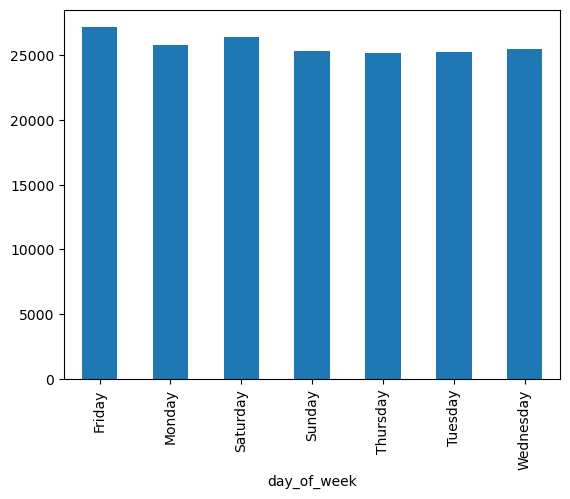

In [168]:
days = df_non_duplicates.groupby('day_of_week')['case_number'].nunique()
days.plot.bar()

**QUESTION 2**

How does the day of the week influence the type and frequency of crimes?



<Figure size 1200x800 with 0 Axes>

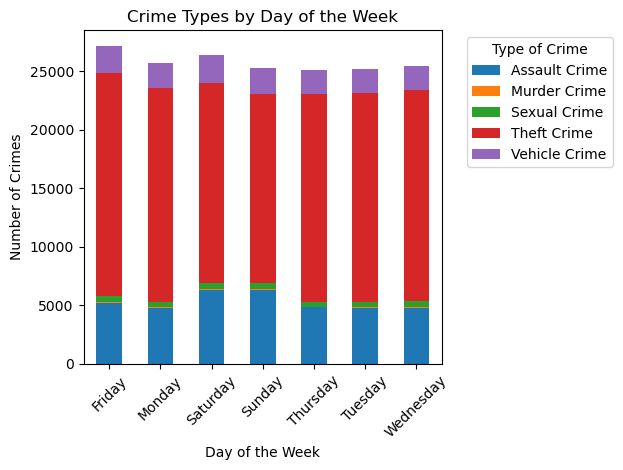

In [179]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by 'day_of_week' and 'incident_type_primary' to count occurrences
crime_by_day = df_non_duplicates.groupby(['day_of_week', 'incident_type_primary']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(12, 8))
crime_by_day.plot(kind='bar', stacked=True)
plt.title('Crime Types by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.legend(title='Type of Crime', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Adjust layout
plt.show()


**Hypothesis 1:**
Certain crimes, like robbery, occur more frequently on weekends due to increased social activities and gatherings.


**Hypothesis 2:**
Vehicle-related crimes show a slight increase on Fridays, likely due to more people commuting or traveling for the weekend.

Significance: Targeting vehicle crime prevention efforts, such as increased surveillance in parking areas, could help reduce incidents on Fridays.


**Significance**  
The bar chart analysis of crime types by day of the week is essential for developing a model that predicts when certain types of crimes are most likely to occur. By visualizing how different crime categories, such as theft, assault, and vehicle crime, vary across days, I gained insights into daily patterns. This enhances the model’s ability to forecast crime occurrences based on time-related data.

**Why is this significant?**  
Accurately identifying daily crime patterns allows the model to anticipate when certain crimes are more likely to occur, making predictions more time-sensitive. For instance, if thefts and vehicle crimes are most common on specific days, the model can prioritize these categories for those days. This understanding is particularly useful for scheduling law enforcement resources and responding to time-specific crime risks. Moreover, when the dataset lacks detailed time information, knowing the prevalent crime types by day helps fill in the gaps, improving prediction accuracy even with incomplete temporal data.

**Exploratory Data Analysis Operations**

**Crime Types by Day of the Week - Bar Chart Analysis:**

- **Operation**: I grouped different crime types (assault, theft, vehicle crime, etc.) by day of the week and visualized the distribution using a stacked bar chart. This revealed how each crime type fluctuates from day to day.
  
- **Outcome**: The bar chart highlighted that theft crimes consistently dominate across all days, while vehicle crimes peak on certain days like Friday. This helped pinpoint which days the model should focus on for specific crime types, improving time-based crime predictions. Additionally, the analysis suggested that weekends see slightly higher rates for crimes like assault, which can be further used to fine-tune the model's forecasts.

<Axes: xlabel='address_1'>

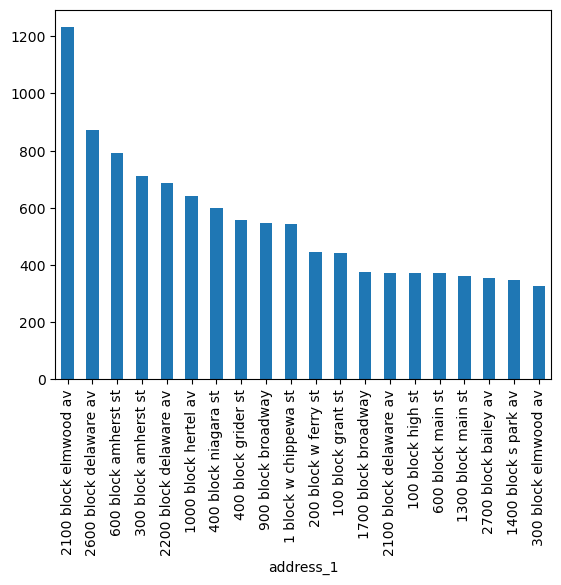

In [170]:
addr_1 = df_non_duplicates.groupby('address_1')['case_number'].count().sort_values(ascending=False)
addr_1 = addr_1[:20]
addr_1.plot.bar()

In [172]:
df_non_duplicates['Year'] = pd.to_datetime(df_non_duplicates['incident_datetime']).dt.year



C:\Users\sanhitha\AppData\Local\Temp\ipykernel_15716\547402293.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_duplicates['Year'] = pd.to_datetime(df_non_duplicates['incident_datetime']).dt.year


    Year  crime_count
0   2011        18799
1   2012        15927
2   2013        12520
3   2014        11833
4   2015        11565
5   2016        11185
6   2017        10258
7   2018        10587
8   2019         8555
9   2020         6111
10  2021         5768
11  2022         3303
12  2023         3131
13  2024         7839


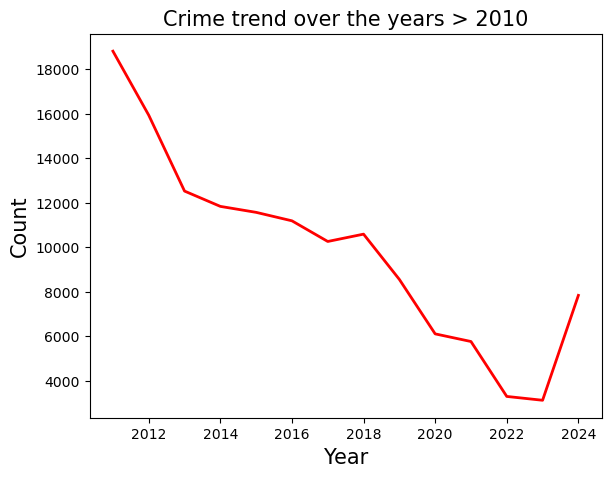

In [174]:
# Filter years greater than 2014
filtered_data1 = df_non_duplicates[df_non_duplicates['Year'] > 2010]

# Group by year and count incidents
crime_count_by_year = filtered_data1.groupby('Year').size().reset_index(name='crime_count')

# Display the resulting DataFrame
print(crime_count_by_year)

# Plotting
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])  # Adjusting the axes
axes.plot(crime_count_by_year['Year'], crime_count_by_year['crime_count'], linewidth=2, color='red')
# Labeling the axes and setting the title
axes.set_xlabel('Year', fontsize=15)
axes.set_ylabel('Count', fontsize=15)
axes.set_title('Crime trend over the years > 2010', fontsize=15)

# Display the plot
plt.show()

C:\Users\sanhitha\AppData\Local\Temp\ipykernel_15716\2333825222.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_duplicates['month'] = df_non_duplicates['incident_datetime'].dt.month


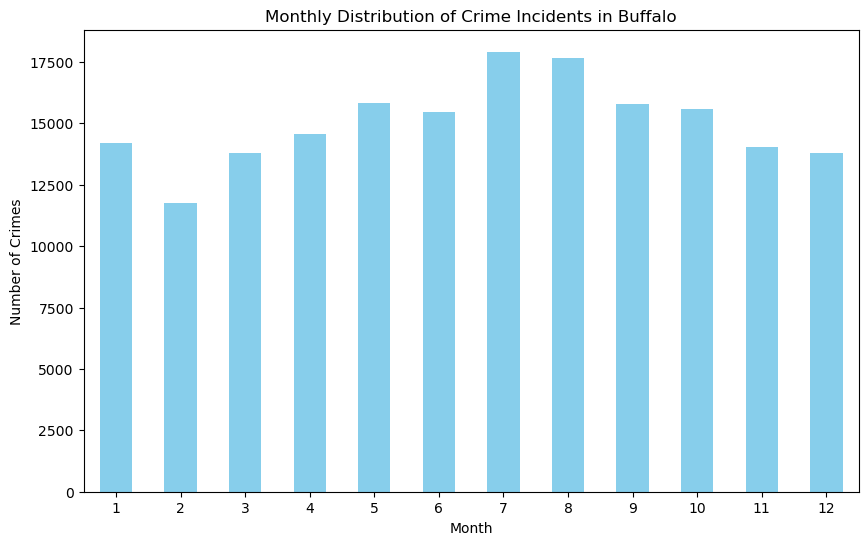

In [176]:
import matplotlib.pyplot as plt

# Extract the month from the date column
df_non_duplicates['month'] = df_non_duplicates['incident_datetime'].dt.month

# Group by month and count the number of crimes
monthly_crime_count = df_non_duplicates.groupby('month').size()

# Plotting
plt.figure(figsize=(10, 6))
monthly_crime_count.plot(kind='bar', color='skyblue')
plt.title('Monthly Distribution of Crime Incidents in Buffalo')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=0)
plt.show()
